In [1]:
from keras.models import model_from_json

json_file = open('model_mnist_images_preprocess.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_images_preprocess.h5")
print("Loaded model from disk")

Using TensorFlow backend.


Loaded model from disk


In [2]:
from keras.models import load_model

In [17]:
#loaded_model = load_model('jointly_model.h5')

In [3]:
# %load mnist_gui.py
import tkinter as tk
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
import cv2
import numpy as np

class ImageGenerator:
    def __init__(self,parent,posx,posy,*kwargs):
        self.parent = parent
        self.posx = posx
        self.posy = posy
        self.sizex = 200
        self.sizey = 200
        self.b1 = "up"
        self.xold = None
        self.yold = None 
        tk.Label(self.parent,text="Predicting Hand-Written Digits",fg="green",font=("",15,"bold")).place(x=50,y=10)
        self.drawing_area=tk.Canvas(self.parent,width=self.sizex,height=self.sizey)
        self.drawing_area.place(x=self.posx,y=self.posy)
        self.drawing_area.bind("<Motion>", self.motion)
        self.drawing_area.bind("<ButtonPress-1>", self.b1down)
        self.drawing_area.bind("<ButtonRelease-1>", self.b1up)
        self.button=tk.Button(self.parent,text="Save Image",width=10,bg='white',command=self.save)
        self.button.place(x=self.sizex/7,y=self.sizey+75)
        self.button1=tk.Button(self.parent,text="Clear",width=10,bg='white',command=self.clear)
        self.button1.place(x=(self.sizex/7)+80,y=self.sizey+75)
        
        self.button2=tk.Button(self.parent,text="Predict",width=10,bg='white',command=self.predict)
        self.button2.place(x=(self.sizex/7)+160,y=self.sizey+75)
        
        self.pr = tk.Label(self.parent,text="Prediction:",fg="blue",font=("",20,"bold"))
        self.pr.place(x=60,y=320)
        
        
        self.res = tk.Label(self.parent,text='None',fg="blue",font=("",20,"bold"))
        self.res.place(x=220,y=320)
        self.image=Image.new("RGB",(200,200),(255,255,255))
        self.draw=ImageDraw.Draw(self.image)

    def save(self):
        filename = "temp.jpg"
        self.image.save(filename)

    def clear(self):
        self.drawing_area.delete("all")
        self.image=Image.new("RGB",(200,200),(255,255,255))
        self.draw=ImageDraw.Draw(self.image)

    def b1down(self,event):
        self.b1 = "down"

    def b1up(self,event):
        self.b1 = "up"
        self.xold = None
        self.yold = None

    def motion(self,event):
        if self.b1 == "down":
            if self.xold is not None and self.yold is not None:
                event.widget.create_line(self.xold,self.yold,event.x,event.y,smooth='true',width=10,fill='black')
                event.widget.create_oval(self.xold,self.yold,event.x,event.y,fill='black')
                self.draw.line(((self.xold,self.yold),(event.x,event.y)),(0,0,0),width=10)
                #self.draw.ellipse(((self.xold,self.yold),(event.x,event.y)),(0,0,0),fill='black')

        self.xold = event.x
        self.yold = event.y
        
    def predict(self):
        img =cv2.imread('temp.jpg')
        img = np.invert(img)
        img = cv2.resize(img,(28,28))
        #kernel = np.ones((15,15), np.uint8) 
        #img_erosion = cv2.erode(img, kernel, iterations=1) 
        arr = np.array(img,dtype='float')
        arr /=255

        arr = arr.reshape(1,28,28,3)
        re=loaded_model.predict(arr).argmax()
        print(re)
        self.res['text']=str(re)
        

if __name__ == "__main__":
    root=tk.Tk()
    root.wm_geometry("%dx%d+%d+%d" % (400, 400, 10, 10))
    root.config(bg='white')
    ImageGenerator(root,60,60)
    root.mainloop()


5
3
4


In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

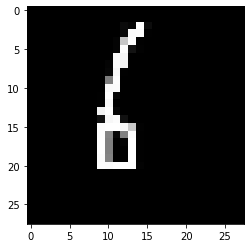

In [7]:
img =cv2.imread('temp.jpg')
img = np.invert(img)

img = cv2.resize(img,(28,28))
#kernel = np.ones((15,15), np.uint8) 
#img_erosion = cv2.erode(img, kernel, iterations=1) 
arr = np.array(img,dtype='float')
arr /=255

arr = arr.reshape(1,28,28,3)

plt.imshow(img)
plt.show()

In [8]:
loaded_model.predict(arr).argmax()

6